## Extract text from pasindu.pdf and save as xx.txt ────────────

In [ ]:
import pdfplumber
import os

pdf_filename = 'pasindu.pdf'
txt_filename = os.path.splitext(pdf_filename)[0] + '.txt'

with pdfplumber.open(pdf_filename) as pdf, open(txt_filename, 'w', encoding='utf-8') as out_f:
    for i, page in enumerate(pdf.pages, start=1):
        text = page.extract_text() or ''
        out_f.write(f"--- Page {i} ---\n")
        out_f.write(text + "\n\n")

print(f"✅ Extracted text saved to: {txt_filename}")


In [1]:
import spacy

# Load your trained model from disk
nlp = spacy.load("cvoutput/model-best")  # adjust path as needed
print("✅ Model loaded")


✅ Model loaded


## Exract skill

In [2]:
# Load text
with open("pasindu.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Process with the model
doc = nlp(raw_text)

# Extract all entities
skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

print("🎯 Detected Skills:")
for skill in skills:
    print("-", skill)

# Optional: remove duplicates
unique_skills = list(set(skills))
print(f"\n✅ Total unique skills: {len(unique_skills)}")


🎯 Detected Skills:
- Codeignitor
- JavaScript
- MySQL
- cPanel
- MERN
- Laravel
- Vue JS
- MySQL
- Git
- Github
- Data Structures
- Agile
- UI/ UX
- Natura - Online
- React
- MySQL
- React Native
- MS
- SQL Fast Learning
- Vue
- Mongo DB
- JS JAVA
- VS Code
- Postman
- Android Development
- Git & Github
- Adobe Photoshop

✅ Total unique skills: 25


# qustion asking and scoring

In [3]:
import json
from collections import defaultdict

# —————————————————————————————————————————————
# 1) Hard‑code your skills
# —————————————————————————————————————————————
SKILLS = ["React", "Java"]

# —————————————————————————————————————————————
# 2) Load the MCQs from JSON
# —————————————————————————————————————————————
with open("mcq.json", "r", encoding="utf-8") as f:
    all_mcqs = json.load(f)

# —————————————————————————————————————————————
# 3) Keep only React/Java questions
# —————————————————————————————————————————————
quiz_questions = [q for q in all_mcqs if q["skill"] in SKILLS]

# —————————————————————————————————————————————
# 4) Quiz runner
# —————————————————————————————————————————————
def run_quiz(questions):
    """
    Presents each question, collects A‑D answers,
    returns a list of (skill, is_correct) tuples.
    """
    results = []
    letter_to_idx = {"A": 0, "B": 1, "C": 2, "D": 3}

    for idx, q in enumerate(questions, start=1):
        print(f"\n{idx}. ({q['skill']}) {q['question']}")
        for letter, opt in zip(letter_to_idx, q["options"]):
            print(f"   {letter}) {opt}")

        # get valid answer
        while True:
            ans = input("Your answer (A‑D): ").strip().upper()
            if ans in letter_to_idx:
                break
            print("  → Please enter A, B, C or D.")

        chosen = q["options"][letter_to_idx[ans]]
        is_correct = (chosen == q["correct_answer"])
        results.append((q["skill"], is_correct))

    return results

# —————————————————————————————————————————————
# 5) Compute per‑skill % score
# —————————————————————————————————————————————
def calc_skill_report(results):
    """
    results: list of (skill, bool)
    returns: dict skill → percentage (0–100)
    """
    tally = defaultdict(lambda: {"correct": 0, "total": 0})
    for skill, ok in results:
        tally[skill]["total"] += 1
        if ok:
            tally[skill]["correct"] += 1

    report = {}
    for skill in SKILLS:
        stats = tally.get(skill, {"correct": 0, "total": 0})
        c, t = stats["correct"], stats["total"]
        pct = (c / t * 100) if t else 0
        report[skill] = pct
    return report

# —————————————————————————————————————————————
# 6) Glue it together
# —————————————————————————————————————————————
if __name__ == "__main__":
    results = run_quiz(quiz_questions)
    report  = calc_skill_report(results)

    print("\n--- Your Scores ---")
    for skill, pct in report.items():
        print(f"{skill}: {pct:.0f}%")



1. (React) Which category best describes React?
   A) Front‑end framework
   B) Back‑end framework
   C) Security standard
   D) Styling language


Your answer (A‑D):  A



2. (React) Who primarily maintains React?
   A) Various
   B) Corporate
   C) Foundation
   D) Independent


Your answer (A‑D):  B



3. (React) In which year was React first released?
   A) 1997
   B) 1999
   C) 1998
   D) 2000


Your answer (A‑D):  A



4. (React) What is a common file extension associated with React?
   A) .json
   B) nan
   C) .js
   D) .yaml


Your answer (A‑D):  A



5. (React) What is a primary use case of React?
   A) Working with front‑end framework
   B) Working with security standard
   C) Working with mobile framework
   D) Working with testing framework


Your answer (A‑D):  A



6. (React) Which command is commonly used to install or initialize React?
   A) apt-get install pkg
   B) nan
   C) brew install pkg
   D) npm install react


Your answer (A‑D):  A



7. (React) What is the primary programming language associated with React?
   A) Swift
   B) JavaScript
   C) Python
   D) nan


Your answer (A‑D):  A



8. (React) Which of these is a key feature of React?
   A) Component‑based UI
   B) Event loop
   C) Routing
   D) Schema‑based queries


Your answer (A‑D):  A



9. (React) Which of the following could be considered a competitor or alternative to React?
   A) GCP
   B) SQLite
   C) Vue
   D) Bash


Your answer (A‑D):  A



10. (React) Under which license is React primarily distributed?
   A) MIT
   B) Public Domain
   C) MPL‑2.0
   D) Proprietary


Your answer (A‑D):  A



11. (Java) Which category best describes Java?
   A) Testing framework
   B) Front‑end framework
   C) Technology
   D) Markup language


Your answer (A‑D):  A



12. (Java) Who primarily maintains Java?
   A) Various
   B) Corporate
   C) Community
   D) Independent


Your answer (A‑D):  A



13. (Java) In which year was Java first released?
   A) 2004
   B) 2003
   C) 2005
   D) 2001


Your answer (A‑D):  A



14. (Java) What is a common file extension associated with Java?
   A) .java
   B) .css
   C) .js
   D) .rs


Your answer (A‑D):  A



15. (Java) What is a primary use case of Java?
   A) Working with technology
   B) Working with security standard
   C) Working with database
   D) Working with networking protocol


Your answer (A‑D):  A



16. (Java) Which command is commonly used to install or initialize Java?
   A) brew install pkg
   B) npm install package
   C) apt-get install pkg
   D) nan


Your answer (A‑D):  A



17. (Java) What is the primary programming language associated with Java?
   A) C#
   B) C++
   C) Java
   D) Kotlin


Your answer (A‑D):  A



18. (Java) Which of these is a key feature of Java?
   A) Scalable compute
   B) Token grant types
   C) Native bridges
   D) Feature X


Your answer (A‑D):  A



19. (Java) Which of the following could be considered a competitor or alternative to Java?
   A) Rust
   B) AWS
   C) Flutter
   D) RabbitMQ


Your answer (A‑D):  A



20. (Java) Under which license is Java primarily distributed?
   A) BSD
   B) Proprietary
   C) Public Domain
   D) MPL‑2.0


Your answer (A‑D):  A



--- Your Scores ---
React: 40%
Java: 30%


# Job description analized

In [6]:
import spacy

# Load your trained model from the output directory
nlp = spacy.load("jdoutput/model-best")  # or "output/model-last" if you prefer

# Test text sample
test_text = """
Frontend Developer

Location: Remote / Hybrid / On‑site (as agreed)
Experience Level: Mid‑level to Senior

Position Overview
We’re looking for a pragmatic, forward‑thinking Frontend Developer who builds performant, maintainable user interfaces. You’ll own the delivery of pixel‑perfect screens, push web performance-improvements, and help set the bar for code quality across our product. No hand‑holding—just real impact and autonomy.

Key Responsibilities
UI Development: Translate UX/UI designs into responsive, accessible, cross‑browser code using modern JavaScript frameworks (React, Vue, or Angular).

Performance Optimization: Profile and optimize front‑end performance (bundle sizes, lazy loading, code‑splitting, caching strategies).

Maintainable Code: Write clean, modular, well‑documented code. Enforce consistent styling with linting, formatting, and code reviews.

Component Library: Build and maintain a reusable component library or design system.

Collaboration: Work directly with Product, UX, and Backend teams; surface trade‑offs early; raise concerns bluntly.

Quality Assurance: Implement unit and integration tests (Jest, Testing Library, Cypress). Ensure 0% regressions.

Continuous Improvement: Keep abreast of frontend trends—progressive web apps, WebAssembly, micro‑frontend architectures—and drive adoption where it adds real value.

Required Qualifications
3+ years of professional frontend development experience.

Expert-level JavaScript (ES6+), HTML5, and CSS3 (including Flexbox/Grid).

Hands‑on experience with React (hooks, context API) or Vue/Angular.

Proven track record optimizing web performance (TTI, CLS, LCP).

Strong understanding of accessibility (WCAG) and internationalization.

Familiarity with RESTful APIs and GraphQL.

Version control with Git, including branching strategies and pull requests.

Preferred Skills
TypeScript proficiency.

Experience with Webpack, Rollup, or Vite.

Knowledge of CI/CD pipelines (GitHub Actions, Jenkins).

Exposure to testing frameworks (Cypress, Playwright).

Background in mobile‑first design and Progressive Web Apps (PWAs).

Understanding of security best practices (CSP, XSS, authentication flows).

What We Offer
Autonomy to own features end‑to‑end.

Competitive compensation and flexible working hours.

Budget for conferences, training, and cutting‑edge tools.

A culture that values honesty, continuous learning, and pragmatic solutions.
"""

# Process the text
doc = nlp(test_text)

# Print entities
print("Entities detected:")
for ent in doc.ents:
    print(f"{ent.text} -> {ent.label_}")


Entities detected:
React -> SKILL_PREFERRED
Angular -> SKILL_PREFERRED
code‑splitting -> SKILL_REQUIRED
Jest -> SKILL_REQUIRED
web apps -> SKILL_REQUIRED
HTML5 -> SKILL_REQUIRED
Flexbox/ -> SKILL_PREFERRED
Grid -> SKILL_PREFERRED
Vue/Angular -> SKILL_PREFERRED
TTI -> SKILL_REQUIRED
CLS -> SKILL_BONUS
LCP -> SKILL_BONUS
RESTful APIs -> SKILL_PREFERRED
GraphQL -> SKILL_BONUS
Git -> SKILL_REQUIRED
including branching strategies -> SKILL_REQUIRED
TypeScript proficiency -> SKILL_REQUIRED
Rollup -> SKILL_REQUIRED
CI/CD pipelines -> SKILL_BONUS
GitHub -> SKILL_PREFERRED
Jenkins -> SKILL_BONUS
PWAs -> SKILL_REQUIRED
XSS -> SKILL_REQUIRED
conferences -> SKILL_REQUIRED
cutting‑edge tools -> SKILL_REQUIRED


In [7]:
# Jupyter Notebook: Candidate Fit Prediction

# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# 2. Define label weights and JD skills
label_weights = {
    "SKILL_REQUIRED":   1.0,
    "SKILL_PREFERRED":  0.6,
    "SKILL_BONUS":      0.3,
}

jd_skills = {
    "React":          "SKILL_PREFERRED",
    "Angular":        "SKILL_PREFERRED",
    "code‑splitting": "SKILL_REQUIRED",
    "Jest":           "SKILL_REQUIRED",
    "web apps":       "SKILL_REQUIRED",
    "HTML5":          "SKILL_REQUIRED",
    "Flexbox/":       "SKILL_PREFERRED",
    "Grid":           "SKILL_PREFERRED",
    "Vue/Angular":    "SKILL_PREFERRED",
    "TTI":            "SKILL_REQUIRED",
    "CLS":            "SKILL_BONUS",
    "LCP":            "SKILL_BONUS",
    "RESTful APIs":   "SKILL_PREFERRED",
    "GraphQL":        "SKILL_BONUS",
    "Git":            "SKILL_REQUIRED",
    "TypeScript":     "SKILL_REQUIRED",
    "Rollup":         "SKILL_REQUIRED",
    "CI/CD pipelines":"SKILL_BONUS",
    "GitHub":         "SKILL_PREFERRED",
    "Jenkins":        "SKILL_BONUS",
    "PWAs":           "SKILL_REQUIRED",
    "XSS":            "SKILL_REQUIRED",
}
skills = list(jd_skills.keys())

# 3. Create synthetic historical dataset
np.random.seed(42)
data = []
for _ in range(200):
    quiz = {s: np.random.randint(20, 101) for s in skills}
    weighted_sum = sum(quiz[s] * label_weights[jd_skills[s]] for s in skills)
    max_sum      = sum(100 * label_weights[jd_skills[s]] for s in skills)
    hire_prob    = weighted_sum / max_sum
    hired_label  = int(np.random.rand() < hire_prob)
    entry = {s: quiz[s] for s in skills}
    entry['hired'] = hired_label
    data.append(entry)

df = pd.DataFrame(data)

# 4. Feature engineering: apply label weights
for s in skills:
    df[s] = df[s] * label_weights[jd_skills[s]]

X = df[skills]
y = df['hired']

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest":       RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting":   GradientBoostingClassifier(random_state=42),
}

# 7. Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds))

# 8. Predict for a new candidate
quiz_scores_new = {
    "React":   40,
    "Java":    30,
    "Angular": 50,
    # others default to 0
}

candidate = {
    s: quiz_scores_new.get(s, 0) * label_weights[jd_skills[s]]
    for s in skills
}
candidate_df = pd.DataFrame([candidate])

print("\n=== Candidate Prediction ===")
for name, model in models.items():
    sel  = model.predict(candidate_df)[0]
    prob = model.predict_proba(candidate_df)[0][1]
    print(f"{name}: selected={bool(sel)}, probability={prob:.2f}")



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        23
           1       0.42      0.59      0.49        17

    accuracy                           0.47        40
   macro avg       0.49      0.49      0.47        40
weighted avg       0.50      0.47      0.47        40


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.64      0.30      0.41        23
           1       0.45      0.76      0.57        17

    accuracy                           0.50        40
   macro avg       0.54      0.53      0.49        40
weighted avg       0.56      0.50      0.48        40


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        23
           1       0.35      0.47      0.40        17

    accuracy                           0.40        40
   macro avg       0.41      0.41      0.40      

In [8]:
# Jupyter Notebook: Candidate Fit Prediction with KNN

# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 2. Define label weights and JD skills
label_weights = {
    "SKILL_REQUIRED":   1.0,
    "SKILL_PREFERRED":  0.6,
    "SKILL_BONUS":      0.3,
}

jd_skills = {
    "React":          "SKILL_PREFERRED",
    "Angular":        "SKILL_PREFERRED",
    "code‑splitting": "SKILL_REQUIRED",
    "Jest":           "SKILL_REQUIRED",
    "web apps":       "SKILL_REQUIRED",
    "HTML5":          "SKILL_REQUIRED",
    "Flexbox/":       "SKILL_PREFERRED",
    "Grid":           "SKILL_PREFERRED",
    "Vue/Angular":    "SKILL_PREFERRED",
    "TTI":            "SKILL_REQUIRED",
    "CLS":            "SKILL_BONUS",
    "LCP":            "SKILL_BONUS",
    "RESTful APIs":   "SKILL_PREFERRED",
    "GraphQL":        "SKILL_BONUS",
    "Git":            "SKILL_REQUIRED",
    "TypeScript":     "SKILL_REQUIRED",
    "Rollup":         "SKILL_REQUIRED",
    "CI/CD pipelines":"SKILL_BONUS",
    "GitHub":         "SKILL_PREFERRED",
    "Jenkins":        "SKILL_BONUS",
    "PWAs":           "SKILL_REQUIRED",
    "XSS":            "SKILL_REQUIRED",
}
skills = list(jd_skills.keys())

# 3. Create synthetic historical dataset
np.random.seed(42)
data = []
for _ in range(200):
    quiz = {s: np.random.randint(20, 101) for s in skills}
    weighted_sum = sum(quiz[s] * label_weights[jd_skills[s]] for s in skills)
    max_sum      = sum(100 * label_weights[jd_skills[s]] for s in skills)
    hire_prob    = weighted_sum / max_sum
    hired_label  = int(np.random.rand() < hire_prob)
    entry = {s: quiz[s] for s in skills}
    entry['hired'] = hired_label
    data.append(entry)

df = pd.DataFrame(data)

# 4. Feature engineering: apply label weights
for s in skills:
    df[s] = df[s] * label_weights[jd_skills[s]]

X = df[skills]
y = df['hired']

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Initialize models (including KNN)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest":       RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting":   GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

# 7. Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds))

# 8. Predict for a new candidate
quiz_scores_new = {
    "React":   40,
    "Java":    30,
    "Angular": 50,
    # other skills default to 0
}

candidate = {
    s: quiz_scores_new.get(s, 0) * label_weights[jd_skills[s]]
    for s in skills
}
candidate_df = pd.DataFrame([candidate])

print("\n=== Candidate Prediction ===")
for name, model in models.items():
    sel  = model.predict(candidate_df)[0]
    prob = model.predict_proba(candidate_df)[0][1]
    print(f"{name}: selected={bool(sel)}, probability={prob:.2f}")



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        23
           1       0.42      0.59      0.49        17

    accuracy                           0.47        40
   macro avg       0.49      0.49      0.47        40
weighted avg       0.50      0.47      0.47        40


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.64      0.30      0.41        23
           1       0.45      0.76      0.57        17

    accuracy                           0.50        40
   macro avg       0.54      0.53      0.49        40
weighted avg       0.56      0.50      0.48        40


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        23
           1       0.35      0.47      0.40        17

    accuracy                           0.40        40
   macro avg       0.41      0.41      0.40      

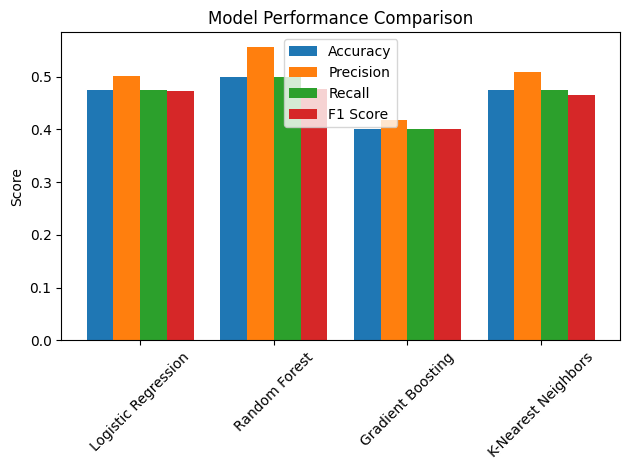

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming models dict and X_test, y_test are already defined as in previous cells:
# models = { "Logistic Regression": ..., "Random Forest": ..., "Gradient Boosting": ..., "K-Nearest Neighbors": ... }

# 1. Compute metrics for each model
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []}
for name, model in models.items():
    preds = model.predict(X_test)
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, preds))
    metrics["Precision"].append(precision_score(y_test, preds, zero_division=0, average='weighted'))
    metrics["Recall"].append(recall_score(y_test, preds, zero_division=0, average='weighted'))
    metrics["F1"].append(f1_score(y_test, preds, zero_division=0, average='weighted'))

df_metrics = pd.DataFrame(metrics).set_index("Model")

# 2. Plot grouped bar chart
x = np.arange(len(df_metrics.index))
width = 0.2

plt.figure()
plt.bar(x - 1.5*width, df_metrics["Accuracy"], width, label='Accuracy')
plt.bar(x - 0.5*width, df_metrics["Precision"], width, label='Precision')
plt.bar(x + 0.5*width, df_metrics["Recall"], width, label='Recall')
plt.bar(x + 1.5*width, df_metrics["F1"], width, label='F1 Score')

plt.xticks(x, df_metrics.index, rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()


In [73]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, classification_report

# 2. Define label weights and JD skills
label_weights = {
    "SKILL_REQUIRED":   1.0,
    "SKILL_PREFERRED":  0.6,
    "SKILL_BONUS":      0.3,
}

jd_skills = {
    "React":          "SKILL_PREFERRED",
    "Angular":        "SKILL_PREFERRED",
    "code‑splitting": "SKILL_REQUIRED",
    "Jest":           "SKILL_REQUIRED",
    "web apps":       "SKILL_REQUIRED",
    "HTML5":          "SKILL_REQUIRED",
    "Flexbox/":       "SKILL_PREFERRED",
    "Grid":           "SKILL_PREFERRED",
    "Vue/Angular":    "SKILL_PREFERRED",
    "TTI":            "SKILL_REQUIRED",
    "CLS":            "SKILL_BONUS",
    "LCP":            "SKILL_BONUS",
    "RESTful APIs":   "SKILL_PREFERRED",
    "GraphQL":        "SKILL_BONUS",
    "Git":            "SKILL_REQUIRED",
    "TypeScript":     "SKILL_REQUIRED",
    "Rollup":         "SKILL_REQUIRED",
    "CI/CD pipelines":"SKILL_BONUS",
    "GitHub":         "SKILL_PREFERRED",
    "Jenkins":        "SKILL_BONUS",
    "PWAs":           "SKILL_REQUIRED",
    "XSS":            "SKILL_REQUIRED",
}
skills = list(jd_skills.keys())

# 3. Create synthetic historical dataset
np.random.seed(42)
data = []
for _ in range(200):
    quiz = {s: np.random.randint(20, 101) for s in skills}
    weighted_sum = sum(quiz[s] * label_weights[jd_skills[s]] for s in skills)
    max_sum      = sum(100 * label_weights[jd_skills[s]] for s in skills)
    hire_prob    = weighted_sum / max_sum
    hired_label  = int(np.random.rand() < hire_prob)
    entry = quiz.copy()
    entry['hired'] = hired_label
    data.append(entry)
df = pd.DataFrame(data)

# 4. Feature engineering: apply label weights
for s in skills:
    df[s] = df[s] * label_weights[jd_skills[s]]
X = df[skills]
y = df['hired']

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Further split train into train2/validation for threshold tuning
X_train2, X_valid, y_train2, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 7. Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid.fit(X_train2, y_train2)
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)

# 8. Find optimal probability threshold on validation set
probs_valid = best_model.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = roc_curve(y_valid, probs_valid)
best_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_idx]
print("Optimal threshold:", best_threshold)

# 9. Evaluate on test set using the optimized threshold
probs_test = best_model.predict_proba(X_test)[:,1]
preds_test = (probs_test >= best_threshold).astype(int)
print("\nTest set performance:")
print(classification_report(y_test, preds_test))

# 10. Prediction helper
def predict_selected(model, df, threshold):
    probs = model.predict_proba(df)[:,1]
    return ["Selected" if p >= threshold else "Not Selected" for p in probs]

# 11. Predict for a new candidate
quiz_scores_new = {
    "Jest":   70,
    "LCP":    30,
    "HTML5": 60,
    # others default to 0
}
candidate = {
    s: quiz_scores_new.get(s, 0) * label_weights[jd_skills[s]]
    for s in skills
}
candidate_df = pd.DataFrame([candidate])
result = predict_selected(best_model, candidate_df, best_threshold)
print("\nCandidate result:", result)


Best params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Optimal threshold: 0.6834048559026499

Test set performance:
              precision    recall  f1-score   support

           0       0.56      0.96      0.71        23
           1       0.00      0.00      0.00        17

    accuracy                           0.55        40
   macro avg       0.28      0.48      0.35        40
weighted avg       0.32      0.55      0.41        40


Candidate result: ['Not Selected']


In [85]:
def compute_candidate_features(quiz_results, jd_skills, label_weights):
    """
    quiz_results: dict skill -> (num_correct, num_questions)
    jd_skills:    dict skill -> SKILL_LABEL
    label_weights: dict SKILL_LABEL -> weight
    returns: flat dict of features
    """
    feats = {}
    total_weight = sum(label_weights[label] for label in jd_skills.values())
    weighted_sum = 0.0

    covered = 0
    for skill, label in jd_skills.items():
        w = label_weights[label]
        if skill in quiz_results:
            correct, total_q = quiz_results[skill]
            pct = (correct / total_q) * 100
            covered += 1
        else:
            pct = 0.0
        weighted = pct * w
        feats[f"{skill}_wt_score"] = weighted
        weighted_sum += weighted

    # aggregate features
    feats["overall_weighted_avg"]   = weighted_sum / total_weight
    feats["skills_covered_ratio"]   = covered / len(jd_skills)
    feats["missing_skills_count"]   = len(jd_skills) - covered
    return feats


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Your JD skill labels and weights:
label_weights = {
    "SKILL_REQUIRED":   1.0,
    "SKILL_PREFERRED":  0.6,
    "SKILL_BONUS":      0.3,
}
jd_skills = {
    "React":         "SKILL_PREFERRED",
    "Angular":       "SKILL_PREFERRED",
    "code‑splitting":"SKILL_REQUIRED",
    "Jest":          "SKILL_REQUIRED",
    "web apps":      "SKILL_REQUIRED",
    "HTML5":         "SKILL_REQUIRED",
    # …etc.
}

# 1) Generate synthetic candidates
np.random.seed(42)
rows = []
for _ in range(200):
    # simulate quiz: for each JD-skill, random correct/total
    quiz = {
      s: (np.random.randint(0, 11), 10)  # 10 questions each skill
      for s in jd_skills
    }
    # compute features
    feats = compute_candidate_features(quiz, jd_skills, label_weights)
    # simulate label based on overall_weighted_avg
    label = int(feats["overall_weighted_avg"] > 65)  # pretend 65% is cutoff
    feats["hired"] = label
    rows.append(feats)

df = pd.DataFrame(rows)

# 2) Split and train
X = df.drop(columns="hired")
y = df["hired"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 3) Evaluate
preds = model.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [88]:
# New candidate’s raw quiz results:
quiz_new = {
  "React": (0, 10),     # 5/10 correct → 50%
  "Angular": (5, 10),
  "Jest": (9, 10), 
  "HTML5": (8, 10), 
    "web apps": (7, 10), 
     "code‑splitting": (7, 10), 
  # they didn’t take Jest, code‑splitting, etc.
}

# 1) Compute features
feats_new = compute_candidate_features(quiz_new, jd_skills, label_weights)
df_new = pd.DataFrame([feats_new])

# 2) ML-based decision
decision = model.predict(df_new)[0]          # 0 or 1
prob      = model.predict_proba(df_new)[0][1] # prob for class “1”
print("Selected" if decision else "Not Selected", f"({prob:.2f} probability)")


Selected (0.71 probability)


In [92]:
# save_and_load_model.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib  # for model persistence

# --- 1. Your helper to compute features ---
def compute_candidate_features(quiz_results, jd_skills, label_weights):
    feats = {}
    total_weight = sum(label_weights[label] for label in jd_skills.values())
    weighted_sum = 0.0
    covered = 0

    for skill, label in jd_skills.items():
        w = label_weights[label]
        if skill in quiz_results:
            correct, total_q = quiz_results[skill]
            pct = (correct / total_q) * 100
            covered += 1
        else:
            pct = 0.0
        weighted = pct * w
        feats[f"{skill}_wt_score"] = weighted
        weighted_sum += weighted

    feats["overall_weighted_avg"] = weighted_sum / total_weight
    feats["skills_covered_ratio"] = covered / len(jd_skills)
    feats["missing_skills_count"] = len(jd_skills) - covered
    return feats

# --- 2. Define your JD skill labels & weights ---
label_weights = {
    "SKILL_REQUIRED":   1.0,
    "SKILL_PREFERRED":  0.6,
    "SKILL_BONUS":      0.3,
}
jd_skills = {
    "React":         "SKILL_PREFERRED",
    "Angular":       "SKILL_PREFERRED",
    "code‑splitting":"SKILL_REQUIRED",
    "Jest":          "SKILL_REQUIRED",
    "web apps":      "SKILL_REQUIRED",
    "HTML5":         "SKILL_REQUIRED",
    # …add the rest as needed
}

# --- 3. (Re)train your model – or skip this block if you already have a trained model file ---
# Generate synthetic data for illustration
np.random.seed(42)
rows = []
for _ in range(200):
    quiz = {s: (np.random.randint(0, 11), 10) for s in jd_skills}
    feats = compute_candidate_features(quiz, jd_skills, label_weights)
    label = int(feats["overall_weighted_avg"] > 65)
    feats["hired"] = label
    rows.append(feats)

df = pd.DataFrame(rows)
X = df.drop(columns="hired")
y = df["hired"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Optional: quick evaluation
preds = model.predict(X_test)
print("Validation performance:\n", classification_report(y_test, preds))

# --- 4. Save your trained model to disk ---
joblib.dump(model, "rf_hire_model.joblib")
print("Model saved to rf_hire_model.joblib")

# -------------------------------------------------------------------
# Now, in a separate script (or later in time), you can reload & test:
# -------------------------------------------------------------------

# --- 5. Load the persisted model ---
loaded_model = joblib.load("rf_hire_model.joblib")
print("Model loaded from rf_hire_model.joblib")

# --- 6. Prepare a new candidate’s quiz results ---
quiz_new = {
    "React":         (5, 10),   # 50%
    "Angular":       (5, 10),   # 50%
    "Jest":          (9, 10),   # 90%
    "HTML5":         (8, 10),   # 80%
    "web apps":      (7, 10),   # 70%
    "code‑splitting":(7, 10),   # 70%
    # others omitted → treated as (0, *),
}

feats_new = compute_candidate_features(quiz_new, jd_skills, label_weights)
df_new = pd.DataFrame([feats_new])

# --- 7. Predict & show probability ---
decision = loaded_model.predict(df_new)[0]            # 0 or 1
prob      = loaded_model.predict_proba(df_new)[0][1]  # probability of class “1”

label_str = "Selected" if decision == 1 else "Not Selected"
print(f"{label_str} ({prob:.2f} probability)")


Validation performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Model saved to rf_hire_model.joblib
Model loaded from rf_hire_model.joblib
Selected (0.76 probability)


# skill matching

In [38]:
!pip install -q sentence-transformers

In [39]:
import re
from sentence_transformers import SentenceTransformer, util

C:\Users\sachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [57]:
jd_text = """
Entities detected:
React -> SKILL_PREFERRED
Angular -> SKILL_PREFERRED
code-splitting -> SKILL_REQUIRED
dart -> SKILL_REQUIRED
web apps -> SKILL_REQUIRED
HTML5 -> SKILL_REQUIRED
Flexbox/ -> SKILL_PREFERRED
Grid -> SKILL_PREFERRED
Vue/Angular -> SKILL_PREFERRED
TTI -> SKILL_REQUIRED
CLS -> SKILL_BONUS
LCP -> SKILL_BONUS
RESTful APIs -> SKILL_PREFERRED
GraphQL -> SKILL_BONUS
Git -> SKILL_REQUIRED
including branching strategies -> SKILL_REQUIRED
TypeScript proficiency -> SKILL_REQUIRED
"""

resume_text = """
🎯 Detected Skills:
- Codeignitor
- JavaScript
- MySQL
- cPanel
- MERN
- Laravel
- Vue JS
- MySQL
- Git
- Github
- Data Structures
- Agile
- UI/ UX
- Natura - Online
- React
- MySQL
- React Native
- MS
- SQL Fast Learning
- Vue
- Mongo DB
- JS JAVA
- VS Code
- flutter
- Android Development
- Git & Github
- Adobe Photoshop

✅ Total unique skills: 25
"""

In [58]:
def parse_jd_entities(text):
    """Return dict {skill: label} from lines like 'X -> SKILL_Y'."""
    pattern = r'^\s*(.+?)\s*->\s*(SKILL_[A-Z]+)\s*$'
    jd = {}
    for line in text.splitlines():
        m = re.match(pattern, line)
        if m:
            skill, label = m.groups()
            jd[skill.strip()] = label
    return jd

def parse_resume_skills(text):
    """Return list of skills from lines beginning with '-'."""
    skills = []
    for line in text.splitlines():
        line = line.strip()
        if line.startswith('-'):
            skills.append(line.lstrip('-').strip())
    return list(dict.fromkeys(skills))  # dedupe, preserve order

jd_skills_dict = parse_jd_entities(jd_text)
resume_skills = parse_resume_skills(resume_text)

print("JD skills →", jd_skills_dict)
print("Resume skills →", resume_skills)

JD skills → {'React': 'SKILL_PREFERRED', 'Angular': 'SKILL_PREFERRED', 'code-splitting': 'SKILL_REQUIRED', 'dart': 'SKILL_REQUIRED', 'web apps': 'SKILL_REQUIRED', 'HTML5': 'SKILL_REQUIRED', 'Flexbox/': 'SKILL_PREFERRED', 'Grid': 'SKILL_PREFERRED', 'Vue/Angular': 'SKILL_PREFERRED', 'TTI': 'SKILL_REQUIRED', 'CLS': 'SKILL_BONUS', 'LCP': 'SKILL_BONUS', 'RESTful APIs': 'SKILL_PREFERRED', 'GraphQL': 'SKILL_BONUS', 'Git': 'SKILL_REQUIRED', 'including branching strategies': 'SKILL_REQUIRED', 'TypeScript proficiency': 'SKILL_REQUIRED'}
Resume skills → ['Codeignitor', 'JavaScript', 'MySQL', 'cPanel', 'MERN', 'Laravel', 'Vue JS', 'Git', 'Github', 'Data Structures', 'Agile', 'UI/ UX', 'Natura - Online', 'React', 'React Native', 'MS', 'SQL Fast Learning', 'Vue', 'Mongo DB', 'JS JAVA', 'VS Code', 'flutter', 'Android Development', 'Git & Github', 'Adobe Photoshop']


In [59]:
model = SentenceTransformer('all-MiniLM-L6-v2')
jd_skills = list(jd_skills_dict.keys())
jd_emb = model.encode(jd_skills, convert_to_tensor=True)
resume_emb = model.encode(resume_skills, convert_to_tensor=True)

In [60]:
hits = util.semantic_search(resume_emb, jd_emb, top_k=1)

for i, hit in enumerate(hits):
    res_skill = resume_skills[i]
    jd_idx = hit[0]['corpus_id']
    score  = hit[0]['score']
    jd_skill = jd_skills[jd_idx]
    label    = jd_skills_dict[jd_skill]
    print(f"{res_skill:20s} ➞ {jd_skill:20s} ({label}), score {score:.3f}")

Codeignitor          ➞ HTML5                (SKILL_REQUIRED), score 0.366
JavaScript           ➞ HTML5                (SKILL_REQUIRED), score 0.528
MySQL                ➞ GraphQL              (SKILL_BONUS), score 0.502
cPanel               ➞ CLS                  (SKILL_BONUS), score 0.399
MERN                 ➞ CLS                  (SKILL_BONUS), score 0.314
Laravel              ➞ RESTful APIs         (SKILL_PREFERRED), score 0.270
Vue JS               ➞ Vue/Angular          (SKILL_PREFERRED), score 0.748
Git                  ➞ Git                  (SKILL_REQUIRED), score 1.000
Github               ➞ Git                  (SKILL_REQUIRED), score 0.759
Data Structures      ➞ GraphQL              (SKILL_BONUS), score 0.353
Agile                ➞ including branching strategies (SKILL_REQUIRED), score 0.375
UI/ UX               ➞ web apps             (SKILL_REQUIRED), score 0.332
Natura - Online      ➞ TTI                  (SKILL_REQUIRED), score 0.294
React                ➞ React          

Git                  ➞ Git                  (SKILL_REQUIRED), score 1.000
React                ➞ React                (SKILL_PREFERRED), score 1.000


# 

In [96]:
# 0) Install dependencies (uncomment if needed)
# !pip install -q sentence-transformers

import re
import json
from collections import defaultdict
from sentence_transformers import SentenceTransformer, util

# —————————————————————————————————————————————
# 1) Your raw extractor outputs
# —————————————————————————————————————————————
jd_text = """
Entities detected:
React -> SKILL_PREFERRED
Angular -> SKILL_PREFERRED
code-splitting -> SKILL_REQUIRED
Jest -> SKILL_REQUIRED
web apps -> SKILL_REQUIRED
HTML5 -> SKILL_REQUIRED
Flexbox/ -> SKILL_PREFERRED
Grid -> SKILL_PREFERRED
Vue/Angular -> SKILL_PREFERRED
TTI -> SKILL_REQUIRED
CLS -> SKILL_BONUS
LCP -> SKILL_BONUS
RESTful APIs -> SKILL_PREFERRED
GraphQL -> SKILL_BONUS
Git -> SKILL_REQUIRED
including branching strategies -> SKILL_REQUIRED
TypeScript proficiency -> SKILL_REQUIRED
"""

resume_text = """
🎯 Detected Skills:
- Codeignitor
- JavaScript
- MySQL
- cPanel
- MERN
- Laravel
- Vue JS
- MySQL
- Git
- Github
- Data Structures
- Agile
- UI/ UX
- Natura - Online
- React
- MySQL
- React Native
- MS
- SQL Fast Learning
- Vue
- Mongo DB
- JS JAVA
- VS Code
- Postman
- Android Development
- Git & Github
- Adobe Photoshop
"""

# —————————————————————————————————————————————
# 2) Parse functions
# —————————————————————————————————————————————
def parse_jd(text):
    jd = {}
    for line in text.splitlines():
        m = re.match(r'^\s*(.+?)\s*->\s*(SKILL_[A-Z]+)\s*$', line)
        if m:
            skill, label = m.groups()
            jd[skill.strip()] = label
    return jd

def parse_resume(text):
    skills = []
    for line in text.splitlines():
        line = line.strip()
        if line.startswith('-'):
            skills.append(line.lstrip('-').strip())
    # dedupe, preserve order
    return list(dict.fromkeys(skills))

jd_dict       = parse_jd(jd_text)
resume_skills = parse_resume(resume_text)
jd_skills     = list(jd_dict.keys())

# —————————————————————————————————————————————
# 3) Embed & match
# —————————————————————————————————————————————
model       = SentenceTransformer('all-MiniLM-L6-v2')
jd_emb      = model.encode(jd_skills,     convert_to_tensor=True)
resume_emb  = model.encode(resume_skills, convert_to_tensor=True)

# find best JD match for each resume skill
hits = util.semantic_search(resume_emb, jd_emb, top_k=1)

# threshold to decide “keep this match”
THRESHOLD = 0.5

matched_resume_skills = []
for i, hit in enumerate(hits):
    score    = hit[0]['score']
    jd_idx   = hit[0]['corpus_id']
    res_skill = resume_skills[i]
    if score >= THRESHOLD:
        matched_resume_skills.append(res_skill)

# dedupe again (if any duplicates)
matched_resume_skills = list(dict.fromkeys(matched_resume_skills))

print("Matched resume skills:", matched_resume_skills)

# —————————————————————————————————————————————
# 4) Load MCQs and filter by matched skills
# —————————————————————————————————————————————
SKILLS = matched_resume_skills

with open("mcq.json", "r", encoding="utf-8") as f:
    all_mcqs = json.load(f)

quiz_questions = [q for q in all_mcqs if q["skill"] in SKILLS]

# —————————————————————————————————————————————
# 5) Quiz runner (unchanged)
# —————————————————————————————————————————————
def run_quiz(questions):
    results = []
    letter_to_idx = {"A": 0, "B": 1, "C": 2, "D": 3}

    for idx, q in enumerate(questions, start=1):
        print(f"\n{idx}. ({q['skill']}) {q['question']}")
        for letter, opt in zip(letter_to_idx, q["options"]):
            print(f"   {letter}) {opt}")

        while True:
            ans = input("Your answer (A-D): ").strip().upper()
            if ans in letter_to_idx:
                break
            print("  → Enter A, B, C or D.")

        chosen    = q["options"][letter_to_idx[ans]]
        is_correct = (chosen == q["correct_answer"])
        results.append((q["skill"], is_correct))

    return results

def calc_skill_report(results):
    tally = defaultdict(lambda: {"correct":0, "total":0})
    for skill, ok in results:
        tally[skill]["total"]   += 1
        tally[skill]["correct"] += int(ok)

    report = {}
    for skill in SKILLS:
        stats = tally.get(skill, {"correct":0, "total":0})
        c, t = stats["correct"], stats["total"]
        report[skill] = (c/t*100) if t else 0
    return report

# —————————————————————————————————————————————
# 6) Run if main
# —————————————————————————————————————————————
if __name__ == "__main__":
    if not quiz_questions:
        print("No questions found for skills:", SKILLS)
    else:
        results = run_quiz(quiz_questions)
        report  = calc_skill_report(results)
        print("\n--- Your Scores ---")
        for skill, pct in report.items():
            print(f"{skill}: {pct:.0f}%")


Matched resume skills: ['JavaScript', 'MySQL', 'Vue JS', 'Git', 'Github', 'React', 'React Native', 'Vue', 'Git & Github']

1. (React) Which category best describes React?
   A) Front‑end framework
   B) Back‑end framework
   C) Security standard
   D) Styling language


Your answer (A-D):  A



2. (React) Who primarily maintains React?
   A) Various
   B) Corporate
   C) Foundation
   D) Independent


Your answer (A-D):  A



3. (React) In which year was React first released?
   A) 1997
   B) 1999
   C) 1998
   D) 2000


Your answer (A-D):  A



4. (React) What is a common file extension associated with React?
   A) .json
   B) nan
   C) .js
   D) .yaml


Your answer (A-D):  A



5. (React) What is a primary use case of React?
   A) Working with front‑end framework
   B) Working with security standard
   C) Working with mobile framework
   D) Working with testing framework


Your answer (A-D):  A



6. (React) Which command is commonly used to install or initialize React?
   A) apt-get install pkg
   B) nan
   C) brew install pkg
   D) npm install react


Your answer (A-D):  A



7. (React) What is the primary programming language associated with React?
   A) Swift
   B) JavaScript
   C) Python
   D) nan


Your answer (A-D):  A



8. (React) Which of these is a key feature of React?
   A) Component‑based UI
   B) Event loop
   C) Routing
   D) Schema‑based queries


Your answer (A-D):  A



9. (React) Which of the following could be considered a competitor or alternative to React?
   A) GCP
   B) SQLite
   C) Vue
   D) Bash


Your answer (A-D):  A



10. (React) Under which license is React primarily distributed?
   A) MIT
   B) Public Domain
   C) MPL‑2.0
   D) Proprietary


Your answer (A-D):  A



11. (JavaScript) Which category best describes JavaScript?
   A) Operating system
   B) Technology
   C) Back‑end runtime
   D) Security protocol


Your answer (A-D):  A



12. (JavaScript) Who primarily maintains JavaScript?
   A) Community
   B) Various
   C) Foundation
   D) Independent


Your answer (A-D):  A



13. (JavaScript) In which year was JavaScript first released?
   A) 1992
   B) 1990
   C) 1987
   D) 1988


Your answer (A-D):  A



14. (JavaScript) What is a common file extension associated with JavaScript?
   A) .css
   B) .py
   C) .js
   D) nan


Your answer (A-D):  A



15. (JavaScript) What is a primary use case of JavaScript?
   A) Working with technology
   B) Working with programming language
   C) Working with testing framework
   D) Working with networking protocol


Your answer (A-D):  A



16. (JavaScript) Which command is commonly used to install or initialize JavaScript?
   A) brew install pkg
   B) pip install package
   C) npm install package
   D) nan


Your answer (A-D):  A



17. (JavaScript) What is the primary programming language associated with JavaScript?
   A) Kotlin
   B) JavaScript
   C) Swift
   D) Go


Your answer (A-D):  A



18. (JavaScript) Which of these is a key feature of JavaScript?
   A) Event loop
   B) Feature X
   C) Publish‑subscribe
   D) Native bridges


Your answer (A-D):  A



19. (JavaScript) Which of the following could be considered a competitor or alternative to JavaScript?
   A) Kubernetes
   B) Jest
   C) Kotlin
   D) Python


Your answer (A-D):  A



20. (JavaScript) Under which license is JavaScript primarily distributed?
   A) MIT
   B) Proprietary
   C) GPL‑2.0
   D) BSD


Your answer (A-D):  A



21. (Vue) Which category best describes Vue?
   A) Cloud platform
   B) DevOps tool
   C) Data library
   D) Front‑end framework


Your answer (A-D):  A



22. (Vue) Who primarily maintains Vue?
   A) Various
   B) Community
   C) Independent
   D) Foundation


Your answer (A-D):  A



23. (Vue) In which year was Vue first released?
   A) 2011
   B) 2014
   C) 2013
   D) 2010


Your answer (A-D):  A



24. (Vue) What is a common file extension associated with Vue?
   A) .json
   B) .cs
   C) nan
   D) .css


Your answer (A-D):  A



25. (Vue) What is a primary use case of Vue?
   A) Working with devops tool
   B) Working with front‑end framework
   C) Working with security standard
   D) Working with networking protocol


Your answer (A-D):  A



26. (Vue) Which command is commonly used to install or initialize Vue?
   A) pip install package
   B) nan
   C) npm install vue
   D) npm install package


Your answer (A-D):  A



27. (Vue) What is the primary programming language associated with Vue?
   A) C#
   B) JavaScript
   C) TypeScript
   D) Swift


Your answer (A-D):  A



28. (Vue) Which of these is a key feature of Vue?
   A) Data manipulation
   B) Full‑duplex
   C) Component‑based UI
   D) Command scripting


Your answer (A-D):  A



29. (Vue) Which of the following could be considered a competitor or alternative to Vue?
   A) MySQL
   B) GitHub Actions
   C) RabbitMQ
   D) Go


Your answer (A-D):  A



30. (Vue) Under which license is Vue primarily distributed?
   A) Proprietary
   B) GPL‑2.0
   C) BSD
   D) MPL‑2.0


Your answer (A-D):  A



31. (MySQL) Which category best describes MySQL?
   A) Database
   B) Security protocol
   C) Front‑end framework
   D) Styling language


Your answer (A-D):  A



32. (MySQL) Who primarily maintains MySQL?
   A) Foundation
   B) Various
   C) Corporate
   D) Community


Your answer (A-D):  A



33. (MySQL) In which year was MySQL first released?
   A) 2006
   B) 2007
   C) 2004
   D) 2005


Your answer (A-D):  A



34. (MySQL) What is a common file extension associated with MySQL?
   A) .rs
   B) .html
   C) .sql
   D) nan


Your answer (A-D):  A



35. (MySQL) What is a primary use case of MySQL?
   A) Working with programming language
   B) Working with back‑end runtime
   C) Working with devops tool
   D) Working with database


Your answer (A-D):  A



36. (MySQL) Which command is commonly used to install or initialize MySQL?
   A) nan
   B) pip install package
   C) brew install pkg
   D) npm install package


Your answer (A-D):  A



37. (MySQL) What is the primary programming language associated with MySQL?
   A) Swift
   B) TypeScript
   C) Python
   D) nan


Your answer (A-D):  A



38. (MySQL) Which of these is a key feature of MySQL?
   A) Loose coupling
   B) Data manipulation
   C) Data storage
   D) Native bridges


Your answer (A-D):  A



39. (MySQL) Which of the following could be considered a competitor or alternative to MySQL?
   A) Pandas
   B) NumPy
   C) CircleCI
   D) Java


Your answer (A-D):  A



40. (MySQL) Under which license is MySQL primarily distributed?
   A) Proprietary
   B) MIT
   C) MPL‑2.0
   D) Apache‑2.0


Your answer (A-D):  A



41. (Git) Which category best describes Git?
   A) DevOps tool
   B) Machine learning library
   C) Security standard
   D) Technology


Your answer (A-D):  A



42. (Git) Who primarily maintains Git?
   A) Corporate
   B) Various
   C) Independent
   D) Community


Your answer (A-D):  A



43. (Git) In which year was Git first released?
   A) 2006
   B) 2004
   C) 2005
   D) 2007


Your answer (A-D):  A



44. (Git) What is a common file extension associated with Git?
   A) nan
   B) .ts
   C) .rs
   D) .yml


Your answer (A-D):  A



45. (Git) What is a primary use case of Git?
   A) Working with devops tool
   B) Working with database
   C) Working with programming language
   D) Working with security standard


Your answer (A-D):  A



46. (Git) Which command is commonly used to install or initialize Git?
   A) pip install package
   B) apt-get install pkg
   C) npm install package
   D) nan


Your answer (A-D):  A



47. (Git) What is the primary programming language associated with Git?
   A) JavaScript
   B) nan
   C) Go
   D) Python


Your answer (A-D):  A



48. (Git) Which of these is a key feature of Git?
   A) Semantic tags
   B) Schema‑based queries
   C) Automation
   D) Cascade


Your answer (A-D):  A



49. (Git) Which of the following could be considered a competitor or alternative to Git?
   A) C#
   B) Bash
   C) React
   D) Kubernetes


Your answer (A-D):  A



50. (Git) Under which license is Git primarily distributed?
   A) MPL‑2.0
   B) MIT
   C) BSD
   D) GPL‑2.0


Your answer (A-D):  A



51. (React Native) Which category best describes React Native?
   A) Database
   B) Architecture style
   C) Technology
   D) Mobile framework


Your answer (A-D):  A



52. (React Native) Who primarily maintains React Native?
   A) Community
   B) Foundation
   C) Independent
   D) Various


Your answer (A-D):  A



53. (React Native) In which year was React Native first released?
   A) 1993
   B) 1994
   C) 1995
   D) 1997


Your answer (A-D):  A



54. (React Native) What is a common file extension associated with React Native?
   A) nan
   B) .py
   C) .go
   D) .rs


Your answer (A-D):  A



55. (React Native) What is a primary use case of React Native?
   A) Working with programming language
   B) Working with networking protocol
   C) Working with security standard
   D) Working with mobile framework


Your answer (A-D):  A



56. (React Native) Which command is commonly used to install or initialize React Native?
   A) npm install package
   B) apt-get install pkg
   C) pip install package
   D) nan


Your answer (A-D):  A



57. (React Native) What is the primary programming language associated with React Native?
   A) C#
   B) nan
   C) Python
   D) Python


Your answer (A-D):  A



58. (React Native) Which of these is a key feature of React Native?
   A) Native bridges
   B) Data manipulation
   C) Component‑based UI
   D) Signed tokens


Your answer (A-D):  A



59. (React Native) Which of the following could be considered a competitor or alternative to React Native?
   A) TensorFlow
   B) Vue
   C) Flask
   D) Angular


Your answer (A-D):  A



60. (React Native) Under which license is React Native primarily distributed?
   A) Apache‑2.0
   B) Public Domain
   C) MPL‑2.0
   D) MIT


Your answer (A-D):  A



--- Your Scores ---
JavaScript: 20%
MySQL: 10%
Vue JS: 0%
Git: 40%
Github: 0%
React: 50%
React Native: 10%
Vue: 30%
Git & Github: 0%


# 


In [93]:
# 0) Install dependencies (uncomment if needed)
# !pip install -q sentence-transformers pandas scikit-learn joblib

import re
import json
import joblib
from collections import defaultdict

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# —————————————————————————————————————————————
# 1) Your raw extractor outputs
# —————————————————————————————————————————————
jd_text = """
Entities detected:
React -> SKILL_PREFERRED
Angular -> SKILL_PREFERRED
code-splitting -> SKILL_REQUIRED
Jest -> SKILL_REQUIRED
web apps -> SKILL_REQUIRED
HTML5 -> SKILL_REQUIRED
Flexbox/ -> SKILL_PREFERRED
Grid -> SKILL_PREFERRED
Vue/Angular -> SKILL_PREFERRED
TTI -> SKILL_REQUIRED
CLS -> SKILL_BONUS
LCP -> SKILL_BONUS
RESTful APIs -> SKILL_PREFERRED
GraphQL -> SKILL_BONUS
Git -> SKILL_REQUIRED
including branching strategies -> SKILL_REQUIRED
TypeScript proficiency -> SKILL_REQUIRED
"""

resume_text = """
🎯 Detected Skills:
- Codeignitor
- JavaScript
- MySQL
- cPanel
- MERN
- Laravel
- Vue JS
- MySQL
- Git
- Github
- Data Structures
- Agile
- UI/ UX
- Natura - Online
- React
- MySQL
- React Native
- MS
- SQL Fast Learning
- Vue
- Mongo DB
- JS JAVA
- VS Code
- Postman
- Android Development
- Git & Github
- Adobe Photoshop
"""

# —————————————————————————————————————————————
# 2) Parse JD & resume into Python structures
# —————————————————————————————————————————————
def parse_jd(text):
    jd = {}
    for line in text.splitlines():
        m = re.match(r'^\s*(.+?)\s*->\s*(SKILL_[A-Z]+)\s*$', line)
        if m:
            skill, label = m.groups()
            jd[skill.strip()] = label
    return jd

def parse_resume(text):
    skills = []
    for line in text.splitlines():
        line = line.strip()
        if line.startswith('-'):
            skills.append(line.lstrip('-').strip())
    return list(dict.fromkeys(skills))  # dedupe preserving order

jd_dict       = parse_jd(jd_text)
resume_skills = parse_resume(resume_text)
jd_skills     = list(jd_dict.keys())

# —————————————————————————————————————————————
# 3) Embed & filter resume skills via semantic similarity
# —————————————————————————————————————————————
embedder = SentenceTransformer('all-MiniLM-L6-v2')
jd_emb    = embedder.encode(jd_skills,     convert_to_tensor=True)
res_emb   = embedder.encode(resume_skills, convert_to_tensor=True)
hits      = util.semantic_search(res_emb, jd_emb, top_k=1)

THRESHOLD = 0.50
matched_resume_skills = []
for i, hit in enumerate(hits):
    score = hit[0]['score']
    if score >= THRESHOLD:
        matched_resume_skills.append(resume_skills[i])
matched_resume_skills = list(dict.fromkeys(matched_resume_skills))

print("→ Matched skills to quiz on:", matched_resume_skills)

# —————————————————————————————————————————————
# 4) Load MCQs & run quiz on matched skills
# —————————————————————————————————————————————
with open("mcq.json", "r", encoding="utf-8") as f:
    all_mcqs = json.load(f)

quiz_questions = [q for q in all_mcqs if q["skill"] in matched_resume_skills]

def run_quiz(questions):
    results = []
    letter_to_idx = {"A":0, "B":1, "C":2, "D":3}
    for idx, q in enumerate(questions, start=1):
        print(f"\n{idx}. ({q['skill']}) {q['question']}")
        for L, opt in zip(letter_to_idx, q["options"]):
            print(f"   {L}) {opt}")
        while True:
            ans = input("Your answer (A-D): ").strip().upper()
            if ans in letter_to_idx: break
            print("  → Enter A, B, C or D.")
        chosen = q["options"][letter_to_idx[ans]]
        results.append((q["skill"], chosen == q["correct_answer"]))
    return results

def calc_raw_counts(results):
    tally = defaultdict(lambda: [0,0])
    for skill, ok in results:
        if ok: tally[skill][0] += 1
        tally[skill][1] += 1
    return {sk: tuple(ct) for sk, ct in tally.items()}

# —————————————————————————————————————————————
# 5) Feature engineering for the ML model
# —————————————————————————————————————————————
label_weights = {
    "SKILL_REQUIRED":   1.0,
    "SKILL_PREFERRED":  0.6,
    "SKILL_BONUS":      0.3,
}

def compute_candidate_features(quiz_stats, jd_dict, label_weights):
    weighted = []
    for skill, label in jd_dict.items():
        correct, total = quiz_stats.get(skill, (0,0))
        pct = (correct/total) if total else 0.0
        weighted.append(pct * label_weights[label])
    overall = sum(weighted) / len(jd_dict)
    return {"overall_weighted_score": overall}

# —————————————————————————————————————————————
# 6) Load your pre-trained RF model and decide
# —————————————————————————————————————————————
if __name__ == "__main__":
    if not quiz_questions:
        print("No quiz questions for skills:", matched_resume_skills)
        exit()

    # run quiz
    results    = run_quiz(quiz_questions)

    # compute raw counts & features
    quiz_stats = calc_raw_counts(results)
    feats_new  = compute_candidate_features(quiz_stats, jd_dict, label_weights)
    df_new     = pd.DataFrame([feats_new])

    # load and use the model
    loaded_model = joblib.load("rf_hire_model.joblib")
    print("Model loaded from rf_hire_model.joblib")

    decision = loaded_model.predict(df_new)[0]          # 1=Selected, 0=Not
    prob      = loaded_model.predict_proba(df_new)[0][1] # P(Selected)

    print("\n=== Final Decision ===")
    print("Selected" if decision else "Not Selected",
          f"({prob:.2f} probability)")


→ Matched skills to quiz on: ['JavaScript', 'MySQL', 'Vue JS', 'Git', 'Github', 'React', 'React Native', 'Vue', 'Git & Github']

1. (React) Which category best describes React?
   A) Front‑end framework
   B) Back‑end framework
   C) Security standard
   D) Styling language


Your answer (A-D):  A



2. (React) Who primarily maintains React?
   A) Various
   B) Corporate
   C) Foundation
   D) Independent


Your answer (A-D):  A



3. (React) In which year was React first released?
   A) 1997
   B) 1999
   C) 1998
   D) 2000


Your answer (A-D):  D



4. (React) What is a common file extension associated with React?
   A) .json
   B) nan
   C) .js
   D) .yaml


Your answer (A-D):  C



5. (React) What is a primary use case of React?
   A) Working with front‑end framework
   B) Working with security standard
   C) Working with mobile framework
   D) Working with testing framework


Your answer (A-D):  A



6. (React) Which command is commonly used to install or initialize React?
   A) apt-get install pkg
   B) nan
   C) brew install pkg
   D) npm install react


Your answer (A-D):  D



7. (React) What is the primary programming language associated with React?
   A) Swift
   B) JavaScript
   C) Python
   D) nan


Your answer (A-D):  B



8. (React) Which of these is a key feature of React?
   A) Component‑based UI
   B) Event loop
   C) Routing
   D) Schema‑based queries


Your answer (A-D):  A



9. (React) Which of the following could be considered a competitor or alternative to React?
   A) GCP
   B) SQLite
   C) Vue
   D) Bash


Your answer (A-D):  C



10. (React) Under which license is React primarily distributed?
   A) MIT
   B) Public Domain
   C) MPL‑2.0
   D) Proprietary


Your answer (A-D):  A



11. (JavaScript) Which category best describes JavaScript?
   A) Operating system
   B) Technology
   C) Back‑end runtime
   D) Security protocol


Your answer (A-D):  C



12. (JavaScript) Who primarily maintains JavaScript?
   A) Community
   B) Various
   C) Foundation
   D) Independent


Your answer (A-D):  A



13. (JavaScript) In which year was JavaScript first released?
   A) 1992
   B) 1990
   C) 1987
   D) 1988


Your answer (A-D):  B



14. (JavaScript) What is a common file extension associated with JavaScript?
   A) .css
   B) .py
   C) .js
   D) nan


Your answer (A-D):  C



15. (JavaScript) What is a primary use case of JavaScript?
   A) Working with technology
   B) Working with programming language
   C) Working with testing framework
   D) Working with networking protocol


Your answer (A-D):  A



16. (JavaScript) Which command is commonly used to install or initialize JavaScript?
   A) brew install pkg
   B) pip install package
   C) npm install package
   D) nan


Your answer (A-D):  D



17. (JavaScript) What is the primary programming language associated with JavaScript?
   A) Kotlin
   B) JavaScript
   C) Swift
   D) Go


Your answer (A-D):  B



18. (JavaScript) Which of these is a key feature of JavaScript?
   A) Event loop
   B) Feature X
   C) Publish‑subscribe
   D) Native bridges


Your answer (A-D):  C



19. (JavaScript) Which of the following could be considered a competitor or alternative to JavaScript?
   A) Kubernetes
   B) Jest
   C) Kotlin
   D) Python


Your answer (A-D):  D



20. (JavaScript) Under which license is JavaScript primarily distributed?
   A) MIT
   B) Proprietary
   C) GPL‑2.0
   D) BSD


Your answer (A-D):  A



21. (Vue) Which category best describes Vue?
   A) Cloud platform
   B) DevOps tool
   C) Data library
   D) Front‑end framework


Your answer (A-D):  D



22. (Vue) Who primarily maintains Vue?
   A) Various
   B) Community
   C) Independent
   D) Foundation


Your answer (A-D):  C



23. (Vue) In which year was Vue first released?
   A) 2011
   B) 2014
   C) 2013
   D) 2010


Your answer (A-D):  A



24. (Vue) What is a common file extension associated with Vue?
   A) .json
   B) .cs
   C) nan
   D) .css


Your answer (A-D):  C



25. (Vue) What is a primary use case of Vue?
   A) Working with devops tool
   B) Working with front‑end framework
   C) Working with security standard
   D) Working with networking protocol


Your answer (A-D):  B



26. (Vue) Which command is commonly used to install or initialize Vue?
   A) pip install package
   B) nan
   C) npm install vue
   D) npm install package


Your answer (A-D):  D



27. (Vue) What is the primary programming language associated with Vue?
   A) C#
   B) JavaScript
   C) TypeScript
   D) Swift


Your answer (A-D):  C



28. (Vue) Which of these is a key feature of Vue?
   A) Data manipulation
   B) Full‑duplex
   C) Component‑based UI
   D) Command scripting


Your answer (A-D):  D



29. (Vue) Which of the following could be considered a competitor or alternative to Vue?
   A) MySQL
   B) GitHub Actions
   C) RabbitMQ
   D) Go


Your answer (A-D):  D



30. (Vue) Under which license is Vue primarily distributed?
   A) Proprietary
   B) GPL‑2.0
   C) BSD
   D) MPL‑2.0


Your answer (A-D):  C



31. (MySQL) Which category best describes MySQL?
   A) Database
   B) Security protocol
   C) Front‑end framework
   D) Styling language


Your answer (A-D):  A



32. (MySQL) Who primarily maintains MySQL?
   A) Foundation
   B) Various
   C) Corporate
   D) Community


Your answer (A-D):  D



33. (MySQL) In which year was MySQL first released?
   A) 2006
   B) 2007
   C) 2004
   D) 2005


Your answer (A-D):  A



34. (MySQL) What is a common file extension associated with MySQL?
   A) .rs
   B) .html
   C) .sql
   D) nan


Your answer (A-D):  C



35. (MySQL) What is a primary use case of MySQL?
   A) Working with programming language
   B) Working with back‑end runtime
   C) Working with devops tool
   D) Working with database


Your answer (A-D):  D



36. (MySQL) Which command is commonly used to install or initialize MySQL?
   A) nan
   B) pip install package
   C) brew install pkg
   D) npm install package


Your answer (A-D):  D



37. (MySQL) What is the primary programming language associated with MySQL?
   A) Swift
   B) TypeScript
   C) Python
   D) nan


Your answer (A-D):  D



38. (MySQL) Which of these is a key feature of MySQL?
   A) Loose coupling
   B) Data manipulation
   C) Data storage
   D) Native bridges


Your answer (A-D):  C



39. (MySQL) Which of the following could be considered a competitor or alternative to MySQL?
   A) Pandas
   B) NumPy
   C) CircleCI
   D) Java


Your answer (A-D):  


  → Enter A, B, C or D.


Your answer (A-D):  D



40. (MySQL) Under which license is MySQL primarily distributed?
   A) Proprietary
   B) MIT
   C) MPL‑2.0
   D) Apache‑2.0


Your answer (A-D):  A



41. (Git) Which category best describes Git?
   A) DevOps tool
   B) Machine learning library
   C) Security standard
   D) Technology


Your answer (A-D):  A



42. (Git) Who primarily maintains Git?
   A) Corporate
   B) Various
   C) Independent
   D) Community


Your answer (A-D):  A



43. (Git) In which year was Git first released?
   A) 2006
   B) 2004
   C) 2005
   D) 2007


Your answer (A-D):  A



44. (Git) What is a common file extension associated with Git?
   A) nan
   B) .ts
   C) .rs
   D) .yml


Your answer (A-D):  A



45. (Git) What is a primary use case of Git?
   A) Working with devops tool
   B) Working with database
   C) Working with programming language
   D) Working with security standard


Your answer (A-D):  A



46. (Git) Which command is commonly used to install or initialize Git?
   A) pip install package
   B) apt-get install pkg
   C) npm install package
   D) nan


Your answer (A-D):  A



47. (Git) What is the primary programming language associated with Git?
   A) JavaScript
   B) nan
   C) Go
   D) Python


Your answer (A-D):  A



48. (Git) Which of these is a key feature of Git?
   A) Semantic tags
   B) Schema‑based queries
   C) Automation
   D) Cascade


Your answer (A-D):  A



49. (Git) Which of the following could be considered a competitor or alternative to Git?
   A) C#
   B) Bash
   C) React
   D) Kubernetes


Your answer (A-D):  A



50. (Git) Under which license is Git primarily distributed?
   A) MPL‑2.0
   B) MIT
   C) BSD
   D) GPL‑2.0


Your answer (A-D):  A



51. (React Native) Which category best describes React Native?
   A) Database
   B) Architecture style
   C) Technology
   D) Mobile framework


Your answer (A-D):  A



52. (React Native) Who primarily maintains React Native?
   A) Community
   B) Foundation
   C) Independent
   D) Various


Your answer (A-D):  A



53. (React Native) In which year was React Native first released?
   A) 1993
   B) 1994
   C) 1995
   D) 1997


Your answer (A-D):  A



54. (React Native) What is a common file extension associated with React Native?
   A) nan
   B) .py
   C) .go
   D) .rs


Your answer (A-D):  A



55. (React Native) What is a primary use case of React Native?
   A) Working with programming language
   B) Working with networking protocol
   C) Working with security standard
   D) Working with mobile framework


Your answer (A-D):  A



56. (React Native) Which command is commonly used to install or initialize React Native?
   A) npm install package
   B) apt-get install pkg
   C) pip install package
   D) nan


Your answer (A-D):  A



57. (React Native) What is the primary programming language associated with React Native?
   A) C#
   B) nan
   C) Python
   D) Python


Your answer (A-D):  A



58. (React Native) Which of these is a key feature of React Native?
   A) Native bridges
   B) Data manipulation
   C) Component‑based UI
   D) Signed tokens


Your answer (A-D):  A



59. (React Native) Which of the following could be considered a competitor or alternative to React Native?
   A) TensorFlow
   B) Vue
   C) Flask
   D) Angular


Your answer (A-D):  A



60. (React Native) Under which license is React Native primarily distributed?
   A) Apache‑2.0
   B) Public Domain
   C) MPL‑2.0
   D) MIT


Your answer (A-D):  A


Model loaded from rf_hire_model.joblib


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- overall_weighted_score
Feature names seen at fit time, yet now missing:
- Angular_wt_score
- HTML5_wt_score
- Jest_wt_score
- React_wt_score
- code‑splitting_wt_score
- ...


In [97]:
# 0) Install dependencies (uncomment if needed)
# !pip install sentence-transformers pandas scikit-learn joblib

import re
import json
from collections import defaultdict
import pandas as pd
import joblib
from sentence_transformers import SentenceTransformer, util

# —————————————————————————————————————————————
# 1) Load your pre-trained RF hire selector model
# —————————————————————————————————————————————
rf = joblib.load("rf_hire_model.joblib")
print("Model loaded from rf_hire_model.joblib")

# —————————————————————————————————————————————
# 2) Your raw extractor outputs (JD & resume texts)
# —————————————————————————————————————————————
jd_text = """
Entities detected:
React -> SKILL_PREFERRED
Angular -> SKILL_PREFERRED
code-splitting -> SKILL_REQUIRED
Jest -> SKILL_REQUIRED
web apps -> SKILL_REQUIRED
HTML5 -> SKILL_REQUIRED
Flexbox/ -> SKILL_PREFERRED
Grid -> SKILL_PREFERRED
Vue/Angular -> SKILL_PREFERRED
TTI -> SKILL_REQUIRED
CLS -> SKILL_BONUS
LCP -> SKILL_BONUS
RESTful APIs -> SKILL_PREFERRED
GraphQL -> SKILL_BONUS
Git -> SKILL_REQUIRED
including branching strategies -> SKILL_REQUIRED
TypeScript proficiency -> SKILL_REQUIRED
"""

resume_text = """
🎯 Detected Skills:
- Codeignitor
- JavaScript
- MySQL
- cPanel
- MERN
- Laravel
- Vue JS
- MySQL
- Git
- Github
- Data Structures
- Agile
- UI/ UX
- Natura - Online
- React
- MySQL
- React Native
- MS
- SQL Fast Learning
- Vue
- Mongo DB
- JS JAVA
- VS Code
- Postman
- Android Development
- Git & Github
- Adobe Photoshop
"""

# —————————————————————————————————————————————
# 3) Parse functions
# —————————————————————————————————————————————
def parse_jd(text):
    jd = {}
    for line in text.splitlines():
        m = re.match(r'^\s*(.+?)\s*->\s*(SKILL_[A-Z]+)\s*$', line)
        if m:
            skill, label = m.groups()
            jd[skill.strip()] = label
    return jd

def parse_resume(text):
    skills = []
    for line in text.splitlines():
        if line.strip().startswith('-'):
            skills.append(line.strip().lstrip('-').strip())
    return list(dict.fromkeys(skills))

jd_dict       = parse_jd(jd_text)
resume_skills = parse_resume(resume_text)
jd_skills     = list(jd_dict.keys())

# —————————————————————————————————————————————
# 4) Embed & filter resume skills via semantic similarity
# —————————————————————————————————————————————
model      = SentenceTransformer('all-MiniLM-L6-v2')
jd_emb     = model.encode(jd_skills, convert_to_tensor=True)
res_emb    = model.encode(resume_skills, convert_to_tensor=True)
hits       = util.semantic_search(res_emb, jd_emb, top_k=1)

THRESHOLD = 0.50
matched_resume_skills = [
    resume_skills[i]
    for i, hit in enumerate(hits)
    if hit[0]['score'] >= THRESHOLD
]
matched_resume_skills = list(dict.fromkeys(matched_resume_skills))
print("Matched skills for quiz:", matched_resume_skills)

# —————————————————————————————————————————————
# 5) Load MCQs and select questions for matched skills
# —————————————————————————————————————————————
with open("mcq.json", "r", encoding="utf-8") as f:
    all_mcqs = json.load(f)

quiz_questions = [
    q for q in all_mcqs
    if q["skill"] in matched_resume_skills
]

# —————————————————————————————————————————————
# 6) Quiz runner & raw count calculator
# —————————————————————————————————————————————
def run_quiz(questions):
    results = []
    letter_to_idx = {"A":0, "B":1, "C":2, "D":3}
    for idx, q in enumerate(questions, start=1):
        print(f"\n{idx}. ({q['skill']}) {q['question']}")
        for L, opt in zip(letter_to_idx, q["options"]):
            print(f"   {L}) {opt}")
        while True:
            ans = input("Your answer (A-D): ").strip().upper()
            if ans in letter_to_idx:
                break
        chosen = q["options"][letter_to_idx[ans]]
        results.append((q["skill"], chosen == q["correct_answer"]))
    return results

def calc_raw_counts(results):
    tally = defaultdict(lambda: [0,0])
    for skill, ok in results:
        tally[skill][1] += 1
        if ok:
            tally[skill][0] += 1
    return {sk: tuple(ct) for sk, ct in tally.items()}

# —————————————————————————————————————————————
# 7) Feature engineering for RF model
# —————————————————————————————————————————————
label_weights = {
    "SKILL_REQUIRED":   1.0,
    "SKILL_PREFERRED":  0.6,
    "SKILL_BONUS":      0.3,
}

def compute_candidate_features(quiz_stats, jd_dict, label_weights):
    feats = {}
    total_weight = sum(label_weights[label] for label in jd_dict.values())
    weighted_sum = 0.0
    covered = 0

    for skill, label in jd_dict.items():
        w = label_weights[label]
        correct, total_q = quiz_stats.get(skill, (0,0))
        pct = correct / total_q if total_q else 0.0
        feats[f"{skill}_wt_score"] = pct * w
        weighted_sum += pct * w
        if total_q > 0:
            covered += 1

    feats["overall_weighted_avg"] = weighted_sum / total_weight
    feats["skills_covered_ratio"] = covered / len(jd_dict)
    feats["missing_skills_count"] = len(jd_dict) - covered
    return feats

# —————————————————————————————————————————————
# 8) Main execution: quiz + prediction
# —————————————————————————————————————————————
if __name__ == "__main__":
    if not quiz_questions:
        print("No questions for skills:", matched_resume_skills)
    else:
        results    = run_quiz(quiz_questions)
        quiz_stats = calc_raw_counts(results)
        feats_new  = compute_candidate_features(quiz_stats, jd_dict, label_weights)
        df_feat    = pd.DataFrame([feats_new])

        decision = rf.predict(df_feat)[0]
        prob     = rf.predict_proba(df_feat)[0][1]
        is_selected = bool(decision)

        print("\n=== FINAL DECISION ===")
        print("Selected" if is_selected else "Not Selected", f"({prob:.2f} probability)")
        print("Boolean flag:", is_selected)


Model loaded from rf_hire_model.joblib
Matched skills for quiz: ['JavaScript', 'MySQL', 'Vue JS', 'Git', 'Github', 'React', 'React Native', 'Vue', 'Git & Github']

1. (React) Which category best describes React?
   A) Front‑end framework
   B) Back‑end framework
   C) Security standard
   D) Styling language


Your answer (A-D):  A



2. (React) Who primarily maintains React?
   A) Various
   B) Corporate
   C) Foundation
   D) Independent


Your answer (A-D):  A



3. (React) In which year was React first released?
   A) 1997
   B) 1999
   C) 1998
   D) 2000


Your answer (A-D):  A



4. (React) What is a common file extension associated with React?
   A) .json
   B) nan
   C) .js
   D) .yaml


Your answer (A-D):  A



5. (React) What is a primary use case of React?
   A) Working with front‑end framework
   B) Working with security standard
   C) Working with mobile framework
   D) Working with testing framework


Your answer (A-D):  A



6. (React) Which command is commonly used to install or initialize React?
   A) apt-get install pkg
   B) nan
   C) brew install pkg
   D) npm install react


Your answer (A-D):  A



7. (React) What is the primary programming language associated with React?
   A) Swift
   B) JavaScript
   C) Python
   D) nan


Your answer (A-D):  A



8. (React) Which of these is a key feature of React?
   A) Component‑based UI
   B) Event loop
   C) Routing
   D) Schema‑based queries


Your answer (A-D):  A



9. (React) Which of the following could be considered a competitor or alternative to React?
   A) GCP
   B) SQLite
   C) Vue
   D) Bash


Your answer (A-D):  A



10. (React) Under which license is React primarily distributed?
   A) MIT
   B) Public Domain
   C) MPL‑2.0
   D) Proprietary


Your answer (A-D):  A



11. (JavaScript) Which category best describes JavaScript?
   A) Operating system
   B) Technology
   C) Back‑end runtime
   D) Security protocol


Your answer (A-D):  A



12. (JavaScript) Who primarily maintains JavaScript?
   A) Community
   B) Various
   C) Foundation
   D) Independent


Your answer (A-D):  A



13. (JavaScript) In which year was JavaScript first released?
   A) 1992
   B) 1990
   C) 1987
   D) 1988


Your answer (A-D):  A



14. (JavaScript) What is a common file extension associated with JavaScript?
   A) .css
   B) .py
   C) .js
   D) nan


Your answer (A-D):  A



15. (JavaScript) What is a primary use case of JavaScript?
   A) Working with technology
   B) Working with programming language
   C) Working with testing framework
   D) Working with networking protocol


Your answer (A-D):  A



16. (JavaScript) Which command is commonly used to install or initialize JavaScript?
   A) brew install pkg
   B) pip install package
   C) npm install package
   D) nan


Your answer (A-D):  A



17. (JavaScript) What is the primary programming language associated with JavaScript?
   A) Kotlin
   B) JavaScript
   C) Swift
   D) Go


Your answer (A-D):  A



18. (JavaScript) Which of these is a key feature of JavaScript?
   A) Event loop
   B) Feature X
   C) Publish‑subscribe
   D) Native bridges


Your answer (A-D):  A



19. (JavaScript) Which of the following could be considered a competitor or alternative to JavaScript?
   A) Kubernetes
   B) Jest
   C) Kotlin
   D) Python


Your answer (A-D):  A



20. (JavaScript) Under which license is JavaScript primarily distributed?
   A) MIT
   B) Proprietary
   C) GPL‑2.0
   D) BSD


Your answer (A-D):  A



21. (Vue) Which category best describes Vue?
   A) Cloud platform
   B) DevOps tool
   C) Data library
   D) Front‑end framework


Your answer (A-D):  A



22. (Vue) Who primarily maintains Vue?
   A) Various
   B) Community
   C) Independent
   D) Foundation


Your answer (A-D):  A



23. (Vue) In which year was Vue first released?
   A) 2011
   B) 2014
   C) 2013
   D) 2010


Your answer (A-D):  A



24. (Vue) What is a common file extension associated with Vue?
   A) .json
   B) .cs
   C) nan
   D) .css


Your answer (A-D):  A



25. (Vue) What is a primary use case of Vue?
   A) Working with devops tool
   B) Working with front‑end framework
   C) Working with security standard
   D) Working with networking protocol


Your answer (A-D):  a



26. (Vue) Which command is commonly used to install or initialize Vue?
   A) pip install package
   B) nan
   C) npm install vue
   D) npm install package


Your answer (A-D):  a



27. (Vue) What is the primary programming language associated with Vue?
   A) C#
   B) JavaScript
   C) TypeScript
   D) Swift


Your answer (A-D):  a



28. (Vue) Which of these is a key feature of Vue?
   A) Data manipulation
   B) Full‑duplex
   C) Component‑based UI
   D) Command scripting


Your answer (A-D):  a



29. (Vue) Which of the following could be considered a competitor or alternative to Vue?
   A) MySQL
   B) GitHub Actions
   C) RabbitMQ
   D) Go


Your answer (A-D):  a



30. (Vue) Under which license is Vue primarily distributed?
   A) Proprietary
   B) GPL‑2.0
   C) BSD
   D) MPL‑2.0


Your answer (A-D):  a



31. (MySQL) Which category best describes MySQL?
   A) Database
   B) Security protocol
   C) Front‑end framework
   D) Styling language


Your answer (A-D):  a



32. (MySQL) Who primarily maintains MySQL?
   A) Foundation
   B) Various
   C) Corporate
   D) Community


Your answer (A-D):  A



33. (MySQL) In which year was MySQL first released?
   A) 2006
   B) 2007
   C) 2004
   D) 2005


Your answer (A-D):  A



34. (MySQL) What is a common file extension associated with MySQL?
   A) .rs
   B) .html
   C) .sql
   D) nan


Your answer (A-D):  A



35. (MySQL) What is a primary use case of MySQL?
   A) Working with programming language
   B) Working with back‑end runtime
   C) Working with devops tool
   D) Working with database


Your answer (A-D):  A



36. (MySQL) Which command is commonly used to install or initialize MySQL?
   A) nan
   B) pip install package
   C) brew install pkg
   D) npm install package


Your answer (A-D):  A



37. (MySQL) What is the primary programming language associated with MySQL?
   A) Swift
   B) TypeScript
   C) Python
   D) nan


Your answer (A-D):  A



38. (MySQL) Which of these is a key feature of MySQL?
   A) Loose coupling
   B) Data manipulation
   C) Data storage
   D) Native bridges


Your answer (A-D):  A



39. (MySQL) Which of the following could be considered a competitor or alternative to MySQL?
   A) Pandas
   B) NumPy
   C) CircleCI
   D) Java


Your answer (A-D):  A



40. (MySQL) Under which license is MySQL primarily distributed?
   A) Proprietary
   B) MIT
   C) MPL‑2.0
   D) Apache‑2.0


Your answer (A-D):  A



41. (Git) Which category best describes Git?
   A) DevOps tool
   B) Machine learning library
   C) Security standard
   D) Technology


Your answer (A-D):  A



42. (Git) Who primarily maintains Git?
   A) Corporate
   B) Various
   C) Independent
   D) Community


Your answer (A-D):  A



43. (Git) In which year was Git first released?
   A) 2006
   B) 2004
   C) 2005
   D) 2007


Your answer (A-D):  A



44. (Git) What is a common file extension associated with Git?
   A) nan
   B) .ts
   C) .rs
   D) .yml


Your answer (A-D):  A



45. (Git) What is a primary use case of Git?
   A) Working with devops tool
   B) Working with database
   C) Working with programming language
   D) Working with security standard


Your answer (A-D):  A



46. (Git) Which command is commonly used to install or initialize Git?
   A) pip install package
   B) apt-get install pkg
   C) npm install package
   D) nan


Your answer (A-D):  A



47. (Git) What is the primary programming language associated with Git?
   A) JavaScript
   B) nan
   C) Go
   D) Python


Your answer (A-D):  A



48. (Git) Which of these is a key feature of Git?
   A) Semantic tags
   B) Schema‑based queries
   C) Automation
   D) Cascade


Your answer (A-D):  A



49. (Git) Which of the following could be considered a competitor or alternative to Git?
   A) C#
   B) Bash
   C) React
   D) Kubernetes


Your answer (A-D):  A



50. (Git) Under which license is Git primarily distributed?
   A) MPL‑2.0
   B) MIT
   C) BSD
   D) GPL‑2.0


Your answer (A-D):  A



51. (React Native) Which category best describes React Native?
   A) Database
   B) Architecture style
   C) Technology
   D) Mobile framework


Your answer (A-D):  A



52. (React Native) Who primarily maintains React Native?
   A) Community
   B) Foundation
   C) Independent
   D) Various


Your answer (A-D):  A



53. (React Native) In which year was React Native first released?
   A) 1993
   B) 1994
   C) 1995
   D) 1997


Your answer (A-D):  A



54. (React Native) What is a common file extension associated with React Native?
   A) nan
   B) .py
   C) .go
   D) .rs


Your answer (A-D):  A



55. (React Native) What is a primary use case of React Native?
   A) Working with programming language
   B) Working with networking protocol
   C) Working with security standard
   D) Working with mobile framework


Your answer (A-D):  A



56. (React Native) Which command is commonly used to install or initialize React Native?
   A) npm install package
   B) apt-get install pkg
   C) pip install package
   D) nan


Your answer (A-D):  A



57. (React Native) What is the primary programming language associated with React Native?
   A) C#
   B) nan
   C) Python
   D) Python


Your answer (A-D):  A



58. (React Native) Which of these is a key feature of React Native?
   A) Native bridges
   B) Data manipulation
   C) Component‑based UI
   D) Signed tokens


Your answer (A-D):  A



59. (React Native) Which of the following could be considered a competitor or alternative to React Native?
   A) TensorFlow
   B) Vue
   C) Flask
   D) Angular


Your answer (A-D):  A



60. (React Native) Under which license is React Native primarily distributed?
   A) Apache‑2.0
   B) Public Domain
   C) MPL‑2.0
   D) MIT


Your answer (A-D):  A


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- CLS_wt_score
- Flexbox/_wt_score
- Git_wt_score
- GraphQL_wt_score
- Grid_wt_score
- ...
Feature names seen at fit time, yet now missing:
- code‑splitting_wt_score


In [98]:
# 0) Install dependencies (uncomment if needed)
# !pip install sentence-transformers pandas scikit-learn joblib

import re
import json
from collections import defaultdict
import pandas as pd
import joblib
from sentence_transformers import SentenceTransformer, util

# —————————————————————————————————————————————
# 1) Load your pre-trained RF hire selector model
# —————————————————————————————————————————————
rf = joblib.load("rf_hire_model.joblib")
print("Model loaded from rf_hire_model.joblib")

# —————————————————————————————————————————————
# 2) Your raw extractor outputs (JD & resume texts)
# —————————————————————————————————————————————
jd_text = """
Entities detected:
React -> SKILL_PREFERRED
Angular -> SKILL_PREFERRED
code-splitting -> SKILL_REQUIRED
Jest -> SKILL_REQUIRED
web apps -> SKILL_REQUIRED
HTML5 -> SKILL_REQUIRED
Flexbox/ -> SKILL_PREFERRED
Grid -> SKILL_PREFERRED
Vue/Angular -> SKILL_PREFERRED
TTI -> SKILL_REQUIRED
CLS -> SKILL_BONUS
LCP -> SKILL_BONUS
RESTful APIs -> SKILL_PREFERRED
GraphQL -> SKILL_BONUS
Git -> SKILL_REQUIRED
including branching strategies -> SKILL_REQUIRED
TypeScript proficiency -> SKILL_REQUIRED
"""

resume_text = """
🎯 Detected Skills:
- Codeignitor
- JavaScript
- MySQL
- cPanel
- MERN
- Laravel
- Vue JS
- MySQL
- Git
- Github
- Data Structures
- Agile
- UI/ UX
- Natura - Online
- React
- MySQL
- React Native
- MS
- SQL Fast Learning
- Vue
- Mongo DB
- JS JAVA
- VS Code
- Postman
- Android Development
- Git & Github
- Adobe Photoshop
"""

# —————————————————————————————————————————————
# 3) Parse JD & resume into Python structures
# —————————————————————————————————————————————
def parse_jd(text):
    jd = {}
    for line in text.splitlines():
        m = re.match(r'^\s*(.+?)\s*->\s*(SKILL_[A-Z]+)\s*$', line)
        if m:
            skill, label = m.groups()
            jd[skill.strip()] = label
    return jd

def parse_resume(text):
    skills = []
    for line in text.splitlines():
        if line.strip().startswith('-'):
            skills.append(line.strip().lstrip('-').strip())
    return list(dict.fromkeys(skills))

jd_dict       = parse_jd(jd_text)
resume_skills = parse_resume(resume_text)
jd_skills     = list(jd_dict.keys())

# —————————————————————————————————————————————
# 4) Embed & filter resume skills via semantic similarity
# —————————————————————————————————————————————
model      = SentenceTransformer('all-MiniLM-L6-v2')
jd_emb     = model.encode(jd_skills, convert_to_tensor=True)
res_emb    = model.encode(resume_skills, convert_to_tensor=True)
hits       = util.semantic_search(res_emb, jd_emb, top_k=1)

THRESHOLD = 0.50
matched_resume_skills = [
    resume_skills[i]
    for i, hit in enumerate(hits)
    if hit[0]['score'] >= THRESHOLD
]
matched_resume_skills = list(dict.fromkeys(matched_resume_skills))
print("Matched skills for quiz:", matched_resume_skills)

# —————————————————————————————————————————————
# 5) Load MCQs and select questions for matched skills
# —————————————————————————————————————————————
with open("mcq.json", "r", encoding="utf-8") as f:
    all_mcqs = json.load(f)

quiz_questions = [
    q for q in all_mcqs
    if q["skill"] in matched_resume_skills
]

# —————————————————————————————————————————————
# 6) Quiz runner & raw count calculator
# —————————————————————————————————————————————
def run_quiz(questions):
    results = []
    letter_to_idx = {"A":0, "B":1, "C":2, "D":3}
    for idx, q in enumerate(questions, start=1):
        print(f"\n{idx}. ({q['skill']}) {q['question']}")
        for L, opt in zip(letter_to_idx, q["options"]):
            print(f"   {L}) {opt}")
        while True:
            ans = input("Your answer (A-D): ").strip().upper()
            if ans in letter_to_idx:
                break
        chosen = q["options"][letter_to_idx[ans]]
        results.append((q["skill"], chosen == q["correct_answer"]))
    return results

def calc_raw_counts(results):
    tally = defaultdict(lambda: [0,0])
    for skill, ok in results:
        tally[skill][1] += 1
        if ok:
            tally[skill][0] += 1
    return {sk: tuple(ct) for sk, ct in tally.items()}

# —————————————————————————————————————————————
# 7) Feature engineering for RF model
# —————————————————————————————————————————————
label_weights = {
    "SKILL_REQUIRED":   1.0,
    "SKILL_PREFERRED":  0.6,
    "SKILL_BONUS":      0.3,
}

def compute_candidate_features(quiz_stats, jd_dict, label_weights):
    feats = {}
    total_weight = sum(label_weights[label] for label in jd_dict.values())
    weighted_sum = 0.0
    covered = 0

    for skill, label in jd_dict.items():
        w = label_weights[label]
        correct, total_q = quiz_stats.get(skill, (0,0))
        pct = correct / total_q if total_q else 0.0
        feats[f"{skill}_wt_score"] = pct * w
        weighted_sum += pct * w
        if total_q > 0:
            covered += 1

    feats["overall_weighted_avg"] = weighted_sum / total_weight
    feats["skills_covered_ratio"] = covered / len(jd_dict)
    feats["missing_skills_count"] = len(jd_dict) - covered
    return feats

# —————————————————————————————————————————————
# 8) Main execution: quiz + prediction
# —————————————————————————————————————————————
if __name__ == "__main__":
    if not quiz_questions:
        print("No questions for skills:", matched_resume_skills)
        exit()

    # run quiz and collect results
    results    = run_quiz(quiz_questions)
    quiz_stats = calc_raw_counts(results)

    # compute features & build DataFrame
    feats_new  = compute_candidate_features(quiz_stats, jd_dict, label_weights)
    df_feat    = pd.DataFrame([feats_new])

    # —— ensure feature names match training-time hyphens —— 
    # replace ASCII hyphens with non-breaking hyphens if needed:
    df_feat.columns = [c.replace('-', '\u2011') for c in df_feat.columns]
    # reindex to model's expected features, filling any missing with zero
    expected = rf.feature_names_in_
    df_feat = df_feat.reindex(columns=expected, fill_value=0)

    # make prediction
    decision    = rf.predict(df_feat)[0]
    prob_select = rf.predict_proba(df_feat)[0][1]
    is_selected = bool(decision)

    print("\n=== FINAL DECISION ===")
    print("Selected" if is_selected else "Not Selected",
          f"({prob_select:.2f} probability)")
    print("Boolean flag:", is_selected)


Model loaded from rf_hire_model.joblib
Matched skills for quiz: ['JavaScript', 'MySQL', 'Vue JS', 'Git', 'Github', 'React', 'React Native', 'Vue', 'Git & Github']

1. (React) Which category best describes React?
   A) Front‑end framework
   B) Back‑end framework
   C) Security standard
   D) Styling language


Your answer (A-D):  A



2. (React) Who primarily maintains React?
   A) Various
   B) Corporate
   C) Foundation
   D) Independent


Your answer (A-D):  A



3. (React) In which year was React first released?
   A) 1997
   B) 1999
   C) 1998
   D) 2000


Your answer (A-D):  A



4. (React) What is a common file extension associated with React?
   A) .json
   B) nan
   C) .js
   D) .yaml


Your answer (A-D):  A



5. (React) What is a primary use case of React?
   A) Working with front‑end framework
   B) Working with security standard
   C) Working with mobile framework
   D) Working with testing framework


Your answer (A-D):  A



6. (React) Which command is commonly used to install or initialize React?
   A) apt-get install pkg
   B) nan
   C) brew install pkg
   D) npm install react


Your answer (A-D):  A



7. (React) What is the primary programming language associated with React?
   A) Swift
   B) JavaScript
   C) Python
   D) nan


Your answer (A-D):  A



8. (React) Which of these is a key feature of React?
   A) Component‑based UI
   B) Event loop
   C) Routing
   D) Schema‑based queries


Your answer (A-D):  A



9. (React) Which of the following could be considered a competitor or alternative to React?
   A) GCP
   B) SQLite
   C) Vue
   D) Bash


Your answer (A-D):  A



10. (React) Under which license is React primarily distributed?
   A) MIT
   B) Public Domain
   C) MPL‑2.0
   D) Proprietary


Your answer (A-D):  A



11. (JavaScript) Which category best describes JavaScript?
   A) Operating system
   B) Technology
   C) Back‑end runtime
   D) Security protocol


Your answer (A-D):  A



12. (JavaScript) Who primarily maintains JavaScript?
   A) Community
   B) Various
   C) Foundation
   D) Independent


Your answer (A-D):  A



13. (JavaScript) In which year was JavaScript first released?
   A) 1992
   B) 1990
   C) 1987
   D) 1988


Your answer (A-D):  A



14. (JavaScript) What is a common file extension associated with JavaScript?
   A) .css
   B) .py
   C) .js
   D) nan


Your answer (A-D):  A



15. (JavaScript) What is a primary use case of JavaScript?
   A) Working with technology
   B) Working with programming language
   C) Working with testing framework
   D) Working with networking protocol


Your answer (A-D):  A



16. (JavaScript) Which command is commonly used to install or initialize JavaScript?
   A) brew install pkg
   B) pip install package
   C) npm install package
   D) nan


Your answer (A-D):  A



17. (JavaScript) What is the primary programming language associated with JavaScript?
   A) Kotlin
   B) JavaScript
   C) Swift
   D) Go


Your answer (A-D):  A



18. (JavaScript) Which of these is a key feature of JavaScript?
   A) Event loop
   B) Feature X
   C) Publish‑subscribe
   D) Native bridges


Your answer (A-D):  A



19. (JavaScript) Which of the following could be considered a competitor or alternative to JavaScript?
   A) Kubernetes
   B) Jest
   C) Kotlin
   D) Python


Your answer (A-D):  A



20. (JavaScript) Under which license is JavaScript primarily distributed?
   A) MIT
   B) Proprietary
   C) GPL‑2.0
   D) BSD


Your answer (A-D):  A



21. (Vue) Which category best describes Vue?
   A) Cloud platform
   B) DevOps tool
   C) Data library
   D) Front‑end framework


Your answer (A-D):  A



22. (Vue) Who primarily maintains Vue?
   A) Various
   B) Community
   C) Independent
   D) Foundation


Your answer (A-D):  A



23. (Vue) In which year was Vue first released?
   A) 2011
   B) 2014
   C) 2013
   D) 2010


Your answer (A-D):  A



24. (Vue) What is a common file extension associated with Vue?
   A) .json
   B) .cs
   C) nan
   D) .css


Your answer (A-D):  A



25. (Vue) What is a primary use case of Vue?
   A) Working with devops tool
   B) Working with front‑end framework
   C) Working with security standard
   D) Working with networking protocol


Your answer (A-D):  A



26. (Vue) Which command is commonly used to install or initialize Vue?
   A) pip install package
   B) nan
   C) npm install vue
   D) npm install package


Your answer (A-D):  A



27. (Vue) What is the primary programming language associated with Vue?
   A) C#
   B) JavaScript
   C) TypeScript
   D) Swift


Your answer (A-D):  A



28. (Vue) Which of these is a key feature of Vue?
   A) Data manipulation
   B) Full‑duplex
   C) Component‑based UI
   D) Command scripting


Your answer (A-D):  A



29. (Vue) Which of the following could be considered a competitor or alternative to Vue?
   A) MySQL
   B) GitHub Actions
   C) RabbitMQ
   D) Go


Your answer (A-D):  A



30. (Vue) Under which license is Vue primarily distributed?
   A) Proprietary
   B) GPL‑2.0
   C) BSD
   D) MPL‑2.0


Your answer (A-D):  A



31. (MySQL) Which category best describes MySQL?
   A) Database
   B) Security protocol
   C) Front‑end framework
   D) Styling language


Your answer (A-D):  A



32. (MySQL) Who primarily maintains MySQL?
   A) Foundation
   B) Various
   C) Corporate
   D) Community


Your answer (A-D):  A



33. (MySQL) In which year was MySQL first released?
   A) 2006
   B) 2007
   C) 2004
   D) 2005


Your answer (A-D):  A



34. (MySQL) What is a common file extension associated with MySQL?
   A) .rs
   B) .html
   C) .sql
   D) nan


Your answer (A-D):  AA
Your answer (A-D):  A



35. (MySQL) What is a primary use case of MySQL?
   A) Working with programming language
   B) Working with back‑end runtime
   C) Working with devops tool
   D) Working with database


Your answer (A-D):  A



36. (MySQL) Which command is commonly used to install or initialize MySQL?
   A) nan
   B) pip install package
   C) brew install pkg
   D) npm install package


Your answer (A-D):  A



37. (MySQL) What is the primary programming language associated with MySQL?
   A) Swift
   B) TypeScript
   C) Python
   D) nan


Your answer (A-D):  A



38. (MySQL) Which of these is a key feature of MySQL?
   A) Loose coupling
   B) Data manipulation
   C) Data storage
   D) Native bridges


Your answer (A-D):  A



39. (MySQL) Which of the following could be considered a competitor or alternative to MySQL?
   A) Pandas
   B) NumPy
   C) CircleCI
   D) Java


Your answer (A-D):  A



40. (MySQL) Under which license is MySQL primarily distributed?
   A) Proprietary
   B) MIT
   C) MPL‑2.0
   D) Apache‑2.0


Your answer (A-D):  A



41. (Git) Which category best describes Git?
   A) DevOps tool
   B) Machine learning library
   C) Security standard
   D) Technology


Your answer (A-D):  A



42. (Git) Who primarily maintains Git?
   A) Corporate
   B) Various
   C) Independent
   D) Community


Your answer (A-D):  A



43. (Git) In which year was Git first released?
   A) 2006
   B) 2004
   C) 2005
   D) 2007


Your answer (A-D):  A



44. (Git) What is a common file extension associated with Git?
   A) nan
   B) .ts
   C) .rs
   D) .yml


Your answer (A-D):  A



45. (Git) What is a primary use case of Git?
   A) Working with devops tool
   B) Working with database
   C) Working with programming language
   D) Working with security standard


Your answer (A-D):  A



46. (Git) Which command is commonly used to install or initialize Git?
   A) pip install package
   B) apt-get install pkg
   C) npm install package
   D) nan


Your answer (A-D):  A



47. (Git) What is the primary programming language associated with Git?
   A) JavaScript
   B) nan
   C) Go
   D) Python


Your answer (A-D):  A



48. (Git) Which of these is a key feature of Git?
   A) Semantic tags
   B) Schema‑based queries
   C) Automation
   D) Cascade


Your answer (A-D):  A



49. (Git) Which of the following could be considered a competitor or alternative to Git?
   A) C#
   B) Bash
   C) React
   D) Kubernetes


Your answer (A-D):  A



50. (Git) Under which license is Git primarily distributed?
   A) MPL‑2.0
   B) MIT
   C) BSD
   D) GPL‑2.0


Your answer (A-D):  A



51. (React Native) Which category best describes React Native?
   A) Database
   B) Architecture style
   C) Technology
   D) Mobile framework


Your answer (A-D):  A



52. (React Native) Who primarily maintains React Native?
   A) Community
   B) Foundation
   C) Independent
   D) Various


Your answer (A-D):  A



53. (React Native) In which year was React Native first released?
   A) 1993
   B) 1994
   C) 1995
   D) 1997


Your answer (A-D):  A



54. (React Native) What is a common file extension associated with React Native?
   A) nan
   B) .py
   C) .go
   D) .rs


Your answer (A-D):  A



55. (React Native) What is a primary use case of React Native?
   A) Working with programming language
   B) Working with networking protocol
   C) Working with security standard
   D) Working with mobile framework


Your answer (A-D):  A



56. (React Native) Which command is commonly used to install or initialize React Native?
   A) npm install package
   B) apt-get install pkg
   C) pip install package
   D) nan


Your answer (A-D):  A



57. (React Native) What is the primary programming language associated with React Native?
   A) C#
   B) nan
   C) Python
   D) Python


Your answer (A-D):  A



58. (React Native) Which of these is a key feature of React Native?
   A) Native bridges
   B) Data manipulation
   C) Component‑based UI
   D) Signed tokens


Your answer (A-D):  A



59. (React Native) Which of the following could be considered a competitor or alternative to React Native?
   A) TensorFlow
   B) Vue
   C) Flask
   D) Angular


Your answer (A-D):  A



60. (React Native) Under which license is React Native primarily distributed?
   A) Apache‑2.0
   B) Public Domain
   C) MPL‑2.0
   D) MIT


Your answer (A-D):  A



=== FINAL DECISION ===
Not Selected (0.00 probability)
Boolean flag: False
